In [1]:
import pandas as pd
import numpy as np
from scipy import sparse
from sklearn.preprocessing import normalize
import time
from tqdm.notebook import tqdm
import datetime
import os
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [2]:
train_joke_df = pd.read_csv(r'data\recsys-in-practice\train_joke_df.csv')
test_joke_df_nofactrating = pd.read_csv(r'data\recsys-in-practice\test_joke_df_nofactrating.csv')
sample_submission = pd.read_csv(r'data\recsys-in-practice\sample_submission.csv')

In [3]:
train_joke_df

,UID,JID,Rating
0,18029,6,-1.26
1,3298,64,-4.17
2,3366,58,0.92
3,12735,92,3.69
4,11365,38,-6.60
...,...,...,...
1448359,22604,26,2.82
1448360,22255,36,-1.94
1448361,21056,40,-9.56
1448362,12328,97,0.87


In [4]:
test_joke_df_nofactrating

,InteractionID,UID,JID
0,0,11228,39
1,1,21724,85
2,2,16782,56
3,3,12105,42
4,4,14427,2
...,...,...,...
362086,362086,3085,66
362087,362087,13765,31
362088,362088,10341,29
362089,362089,3553,8


In [5]:
sample_submission

,InteractionID,Rating
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
362086,362086,0.0
362087,362087,0.0
362088,362088,0.0
362089,362089,0.0


In [6]:
users_count = np.unique(test_joke_df_nofactrating["UID"]).size
jokes_count = np.unique(test_joke_df_nofactrating["JID"]).size
users_count, jokes_count

(24983, 100)

In [7]:
users_count = np.unique(train_joke_df["UID"]).size
jokes_count = np.unique(train_joke_df["JID"]).size
users_count, jokes_count

(24983, 100)

In [8]:
#rating = train_joke_df['Rating'].values
#print(np.min(rating), np.max(np.abs(rating)), np.max(np.abs(rating)))

#rating_norm = (rating - np.min(rating)) / (np.max(rating) - np.min(rating))
#rating_norm = rating / np.max(np.abs(rating))
#print(np.min(rating_norm), np.max(rating_norm))

In [9]:
#train_joke_df['Rating_norm'] = rating_norm
#X = np.zeros((users_count, jokes_count))

#for row in tqdm(train_joke_df.values):
#    user_id = int(row[0]) - 1
#    joke_id = int(row[1]) - 1
    
#    rating = row[3]
    
#    X[user_id, joke_id] = rating

In [10]:
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn

In [11]:
class FeaturesDataset(Dataset):
    def __init__(self, features):
        self.features = features
            
    def __getitem__(self, index: int):            
        return torch.tensor(self.features[index], dtype=torch.float).to(device)
    
    def __len__(self):
        return len(self.features)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_df, test_df = train_test_split(train_joke_df, test_size=0.5, random_state=42)

In [14]:
train_df.groupby("UID").count().mean()

JID       28.986991
Rating    28.986991
dtype: float64

In [15]:
test_df.groupby("UID").count().mean()

JID       28.986991
Rating    28.986991
dtype: float64

In [16]:
np.unique(train_df["UID"]).size, np.unique(train_df["JID"]).size

(24983, 100)

In [17]:
np.unique(test_df["UID"]).size, np.unique(test_df["JID"]).size

(24983, 100)

In [18]:
#np.unique(train_df["Rating"])

In [19]:
#np.unique(test_df["Rating"])

In [20]:
sorted(Counter(train_df["Rating"]).items(), key=lambda item: item[1], reverse=True)

[(-0.29, 5822),
 (2.62, 2969),
 (-0.49, 2934),
 (5.73, 2934),
 (-0.39, 2896),
 (2.82, 2890),
 (-0.53, 2871),
 (-0.44, 2868),
 (3.2, 2859),
 (4.17, 2821),
 (-0.34, 2772),
 (3.01, 2725),
 (8.83, 2704),
 (-0.24, 2693),
 (2.77, 2658),
 (2.43, 2641),
 (3.16, 2640),
 (2.96, 2640),
 (-0.58, 2631),
 (3.4, 2609),
 (2.72, 2606),
 (2.91, 2602),
 (1.07, 2596),
 (3.11, 2593),
 (3.25, 2593),
 (2.23, 2579),
 (3.59, 2571),
 (1.46, 2559),
 (2.57, 2557),
 (3.3, 2550),
 (3.64, 2544),
 (4.37, 2542),
 (3.45, 2541),
 (3.83, 2538),
 (7.28, 2532),
 (3.54, 2524),
 (3.06, 2523),
 (1.26, 2517),
 (-0.63, 2514),
 (-0.19, 2511),
 (3.35, 2509),
 (2.86, 2507),
 (3.79, 2501),
 (3.5, 2496),
 (2.38, 2494),
 (2.52, 2482),
 (9.03, 2481),
 (2.18, 2473),
 (-0.68, 2470),
 (2.67, 2460),
 (2.09, 2455),
 (2.48, 2450),
 (3.98, 2445),
 (1.65, 2436),
 (1.99, 2432),
 (1.7, 2426),
 (-0.15, 2425),
 (1.84, 2425),
 (1.21, 2423),
 (2.33, 2419),
 (3.69, 2419),
 (-0.1, 2418),
 (3.74, 2417),
 (2.28, 2416),
 (1.94, 2412),
 (2.14, 2404),
 (1

In [21]:
sorted(Counter(test_df["Rating"]).items(), key=lambda item: item[1], reverse=True)

[(-0.29, 5660),
 (2.62, 2963),
 (-0.39, 2962),
 (5.73, 2913),
 (-0.44, 2903),
 (-0.49, 2877),
 (-0.53, 2866),
 (2.82, 2838),
 (-0.34, 2833),
 (4.17, 2791),
 (3.01, 2755),
 (3.2, 2728),
 (8.83, 2710),
 (3.4, 2686),
 (3.35, 2674),
 (2.96, 2673),
 (-0.58, 2654),
 (3.16, 2639),
 (2.57, 2623),
 (1.07, 2613),
 (3.59, 2607),
 (2.86, 2600),
 (2.43, 2595),
 (2.38, 2582),
 (2.77, 2579),
 (3.06, 2577),
 (3.11, 2569),
 (2.23, 2566),
 (1.26, 2563),
 (-0.24, 2559),
 (2.72, 2550),
 (3.79, 2539),
 (1.46, 2538),
 (3.25, 2538),
 (3.54, 2537),
 (3.5, 2536),
 (3.45, 2528),
 (2.67, 2525),
 (7.28, 2523),
 (2.48, 2522),
 (-0.63, 2517),
 (-0.19, 2511),
 (2.52, 2510),
 (3.3, 2508),
 (1.84, 2487),
 (2.91, 2475),
 (9.03, 2474),
 (3.64, 2469),
 (1.17, 2466),
 (2.04, 2453),
 (2.33, 2453),
 (3.69, 2452),
 (-0.68, 2450),
 (1.65, 2441),
 (2.18, 2441),
 (3.74, 2439),
 (1.99, 2429),
 (2.09, 2425),
 (3.93, 2422),
 (1.12, 2412),
 (1.6, 2402),
 (1.94, 2401),
 (3.98, 2400),
 (1.8, 2394),
 (3.83, 2391),
 (0.68, 2380),
 (2.2

C:\ProgramData\Anaconda3\envs\torchvision\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

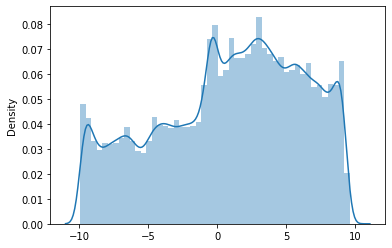

In [22]:
sns.distplot(train_df['Rating'].values)

C:\ProgramData\Anaconda3\envs\torchvision\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

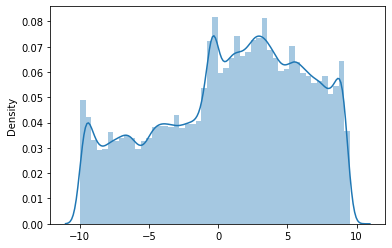

In [23]:
sns.distplot(test_df['Rating'].values)

In [24]:
X_train = np.zeros((users_count, jokes_count))

for row in tqdm(train_df.values):
    user_id = int(row[0]) - 1
    joke_id = int(row[1]) - 1
    
    rating = row[2]
    
    X_train[user_id, joke_id] = rating

  0%|          | 0/724182 [00:00<?, ?it/s]

In [25]:
X_test = np.zeros((users_count, jokes_count))

for row in tqdm(test_df.values):
    user_id = int(row[0]) - 1
    joke_id = int(row[1]) - 1
    
    rating = row[2]
    
    X_test[user_id, joke_id] = rating

  0%|          | 0/724182 [00:00<?, ?it/s]

In [26]:
#X_train, X_test = train_test_split(X, test_size=0.15, random_state=42)
#X_train.shape, X_test.shape

In [27]:
dataset_train = FeaturesDataset(X_train)
dataset_test = FeaturesDataset(X_test)

In [28]:
import torch

In [29]:
device = "cpu"#"cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [30]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']


def save(model, name):
    os.mkdir(f"artifacts2/{name}")
    #torch.save(model, f"{name}/model.pkl")
    torch.save(model.state_dict(), f"artifacts2/{name}/checkpoint.pth")
    
def load(name):
    return torch.load(f"artifacts2/{name}/model.pkl")


def load2(name, model):
    model.load_state_dict(torch.load(f"artifacts2/{name}/checkpoint.pth"))
    
def train_model(epoch_start, model, train_loader, val_loader, loss, optimizer, num_epochs, scheduler, loss_train_history, loss_val_history):
    best_loss = compute_accuracy(model, val_loader, loss)
    print('loss:', best_loss)
    bet_model_name = None
    for epoch in range(epoch_start, epoch_start + num_epochs):
        t1 = time.time()
        model.train()
        loss_accum = 0
        for i_step, x,in enumerate(train_loader):
            prediction = model(x)    
            loss_value = loss(prediction, x)
            optimizer.zero_grad()
            loss_value.backward()
            optimizer.step()            
            loss_accum += loss_value
            
          
        ave_loss = loss_accum / (i_step + 1)
        loss_val = compute_accuracy(model, val_loader, loss)
        
        loss_train_history.append(float(ave_loss))
        loss_val_history.append(loss_val)
        
        if scheduler != None:
            scheduler.step()
        
        if loss_val < best_loss:
            best_loss = loss_val
            bet_model_name = f'{datetime.datetime.now().strftime("%d.%m.%Y_%H.%M.%S.%f")}_epoch_{epoch}_loss_{round(best_loss, 4)}'
            save(model, bet_model_name)
            print(f"saved {bet_model_name}")
            
        print("Epoch: %i lr: %f; Train loss: %f, Val loss: %f, time: %i s" % (epoch, get_lr(optimizer), ave_loss, loss_val,
                                                                            round(time.time() - t1)))
    return bet_model_name
        
    
def compute_accuracy(model, loader, loss):
    """
    Computes accuracy on the dataset wrapped in a loader    
    Returns: accuracy as a float value between 0 and 1
    """
    model.eval()
    loss_accum = 0
    for i_step, x in enumerate(loader):
        prediction = model(x)
        loss_value = loss(prediction, x)
        loss_accum += loss_value

    ave_loss = loss_accum / (i_step + 1)         
    return float(ave_loss)

In [31]:
class VAEModel(nn.Module):
    def __init__(self, input_shape, seed, ratings_range):
        super().__init__()
        self.seed = torch.manual_seed(seed)
        self.y_range = ratings_range
        
        shape = 64
        self.encode = nn.Sequential(
                nn.Linear(input_shape, shape),
                nn.Dropout(0.66),
                nn.BatchNorm1d(shape),
                nn.ReLU(inplace=True),    

                nn.Linear(shape, shape // 2),
                )


        self.decode = nn.Sequential(
                nn.Linear(shape // 2, shape),
                nn.Dropout(0.66),
                nn.BatchNorm1d(shape),
                nn.ReLU(inplace=True),         
                        
                nn.Linear(shape, input_shape),
                )        
    def forward(self, x):
        embeddings = self.encode(x)        
        result = self.decode(embeddings)
        return (torch.sigmoid(result) * (self.y_range[1] - self.y_range[0]) + self.y_range[0])
    
    
input_shape = X_train.shape[1]
display(input_shape)

nn_model = VAEModel(input_shape, seed=1024, ratings_range=[-10, 10]).to(device)

print(nn_model)

loss_train_history, loss_val_history = [], []

100

VAEModel(
  (encode): Sequential(
    (0): Linear(in_features=100, out_features=64, bias=True)
    (1): Dropout(p=0.66, inplace=False)
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=64, out_features=32, bias=True)
  )
  (decode): Sequential(
    (0): Linear(in_features=32, out_features=64, bias=True)
    (1): Dropout(p=0.66, inplace=False)
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=64, out_features=100, bias=True)
  )
)


In [32]:
for x in tqdm(DataLoader(dataset_train, batch_size=8)):
    break
print(x.shape)
nn_model(x).shape

  0%|          | 0/3123 [00:00<?, ?it/s]

torch.Size([8, 100])


torch.Size([8, 100])

In [33]:
def RMSE_loss(prediction, target):
    return torch.sqrt(nn.MSELoss()(prediction, target))

In [34]:
optimizer = torch.optim.Adam(nn_model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.9)


bet_model_name = train_model(0,
    nn_model, 
    DataLoader(dataset_train, batch_size=100000),
    DataLoader(dataset_test, batch_size=100000),
    RMSE_loss, optimizer, 1000, scheduler, loss_train_history, loss_val_history)
print('end!')
print(bet_model_name)

loss: 2.954916000366211
saved 22.04.2023_16.10.42.848087_epoch_0_loss_2.9209
Epoch: 0 lr: 0.001000; Train loss: 3.447392, Val loss: 2.920904, time: 1 s
saved 22.04.2023_16.10.43.268784_epoch_1_loss_2.903
Epoch: 1 lr: 0.001000; Train loss: 3.398183, Val loss: 2.903017, time: 0 s
saved 22.04.2023_16.10.43.795671_epoch_2_loss_2.8912
Epoch: 2 lr: 0.001000; Train loss: 3.352556, Val loss: 2.891205, time: 1 s
saved 22.04.2023_16.10.44.222689_epoch_3_loss_2.8826
Epoch: 3 lr: 0.001000; Train loss: 3.311637, Val loss: 2.882556, time: 0 s
saved 22.04.2023_16.10.44.740926_epoch_4_loss_2.8757
Epoch: 4 lr: 0.000900; Train loss: 3.271966, Val loss: 2.875717, time: 1 s
saved 22.04.2023_16.10.45.160093_epoch_5_loss_2.8705
Epoch: 5 lr: 0.000900; Train loss: 3.235353, Val loss: 2.870477, time: 0 s
saved 22.04.2023_16.10.45.667857_epoch_6_loss_2.866
Epoch: 6 lr: 0.000900; Train loss: 3.203673, Val loss: 2.866008, time: 1 s
saved 22.04.2023_16.10.46.089174_epoch_7_loss_2.8621
Epoch: 7 lr: 0.000900; Train 

saved 22.04.2023_16.11.12.423827_epoch_64_loss_2.7493
Epoch: 64 lr: 0.000254; Train loss: 2.830935, Val loss: 2.749273, time: 0 s
saved 22.04.2023_16.11.12.914932_epoch_65_loss_2.7482
Epoch: 65 lr: 0.000254; Train loss: 2.830649, Val loss: 2.748202, time: 0 s
saved 22.04.2023_16.11.13.331778_epoch_66_loss_2.7473
Epoch: 66 lr: 0.000254; Train loss: 2.827850, Val loss: 2.747251, time: 0 s
saved 22.04.2023_16.11.13.828985_epoch_67_loss_2.7463
Epoch: 67 lr: 0.000254; Train loss: 2.827462, Val loss: 2.746301, time: 0 s
saved 22.04.2023_16.11.14.264658_epoch_68_loss_2.7453
Epoch: 68 lr: 0.000254; Train loss: 2.825804, Val loss: 2.745343, time: 0 s
saved 22.04.2023_16.11.14.770778_epoch_69_loss_2.7444
Epoch: 69 lr: 0.000229; Train loss: 2.824990, Val loss: 2.744384, time: 1 s
saved 22.04.2023_16.11.15.187991_epoch_70_loss_2.7435
Epoch: 70 lr: 0.000229; Train loss: 2.825273, Val loss: 2.743518, time: 0 s
saved 22.04.2023_16.11.15.698178_epoch_71_loss_2.7426
Epoch: 71 lr: 0.000229; Train loss: 

saved 22.04.2023_16.11.41.169185_epoch_127_loss_2.7153
Epoch: 127 lr: 0.000072; Train loss: 2.794258, Val loss: 2.715323, time: 0 s
saved 22.04.2023_16.11.41.640626_epoch_128_loss_2.7151
Epoch: 128 lr: 0.000072; Train loss: 2.794327, Val loss: 2.715080, time: 0 s
saved 22.04.2023_16.11.42.111107_epoch_129_loss_2.7148
Epoch: 129 lr: 0.000065; Train loss: 2.793468, Val loss: 2.714810, time: 0 s
saved 22.04.2023_16.11.42.521898_epoch_130_loss_2.7145
Epoch: 130 lr: 0.000065; Train loss: 2.794171, Val loss: 2.714540, time: 0 s
saved 22.04.2023_16.11.43.010621_epoch_131_loss_2.7143
Epoch: 131 lr: 0.000065; Train loss: 2.794532, Val loss: 2.714257, time: 0 s
saved 22.04.2023_16.11.43.424072_epoch_132_loss_2.714
Epoch: 132 lr: 0.000065; Train loss: 2.793651, Val loss: 2.714041, time: 0 s
saved 22.04.2023_16.11.43.911386_epoch_133_loss_2.7138
Epoch: 133 lr: 0.000065; Train loss: 2.792593, Val loss: 2.713812, time: 0 s
saved 22.04.2023_16.11.44.332935_epoch_134_loss_2.7135
Epoch: 134 lr: 0.00005

saved 22.04.2023_16.12.09.779800_epoch_190_loss_2.707
Epoch: 190 lr: 0.000018; Train loss: 2.784968, Val loss: 2.707000, time: 1 s
saved 22.04.2023_16.12.10.195579_epoch_191_loss_2.7069
Epoch: 191 lr: 0.000018; Train loss: 2.785179, Val loss: 2.706905, time: 0 s
saved 22.04.2023_16.12.10.681832_epoch_192_loss_2.7069
Epoch: 192 lr: 0.000018; Train loss: 2.784698, Val loss: 2.706864, time: 0 s
saved 22.04.2023_16.12.11.109872_epoch_193_loss_2.7068
Epoch: 193 lr: 0.000018; Train loss: 2.784525, Val loss: 2.706815, time: 0 s
saved 22.04.2023_16.12.11.594765_epoch_194_loss_2.7067
Epoch: 194 lr: 0.000016; Train loss: 2.785041, Val loss: 2.706749, time: 0 s
saved 22.04.2023_16.12.12.012011_epoch_195_loss_2.7067
Epoch: 195 lr: 0.000016; Train loss: 2.784603, Val loss: 2.706663, time: 0 s
saved 22.04.2023_16.12.12.486547_epoch_196_loss_2.7066
Epoch: 196 lr: 0.000016; Train loss: 2.784819, Val loss: 2.706562, time: 0 s
saved 22.04.2023_16.12.12.911680_epoch_197_loss_2.7065
Epoch: 197 lr: 0.00001

saved 22.04.2023_16.12.41.565966_epoch_260_loss_2.7045
Epoch: 260 lr: 0.000004; Train loss: 2.782854, Val loss: 2.704514, time: 0 s
saved 22.04.2023_16.12.42.055240_epoch_261_loss_2.7045
Epoch: 261 lr: 0.000004; Train loss: 2.782440, Val loss: 2.704500, time: 0 s
saved 22.04.2023_16.12.42.526809_epoch_262_loss_2.7045
Epoch: 262 lr: 0.000004; Train loss: 2.782866, Val loss: 2.704453, time: 0 s
Epoch: 263 lr: 0.000004; Train loss: 2.781248, Val loss: 2.704464, time: 0 s
Epoch: 264 lr: 0.000004; Train loss: 2.781375, Val loss: 2.704480, time: 0 s
Epoch: 265 lr: 0.000004; Train loss: 2.780619, Val loss: 2.704551, time: 0 s
Epoch: 266 lr: 0.000004; Train loss: 2.782570, Val loss: 2.704477, time: 0 s
Epoch: 267 lr: 0.000004; Train loss: 2.781648, Val loss: 2.704466, time: 0 s
Epoch: 268 lr: 0.000004; Train loss: 2.781392, Val loss: 2.704535, time: 0 s
Epoch: 269 lr: 0.000003; Train loss: 2.781066, Val loss: 2.704594, time: 0 s
Epoch: 270 lr: 0.000003; Train loss: 2.781947, Val loss: 2.704611

Epoch: 349 lr: 0.000001; Train loss: 2.781022, Val loss: 2.704073, time: 0 s
Epoch: 350 lr: 0.000001; Train loss: 2.781886, Val loss: 2.704054, time: 0 s
Epoch: 351 lr: 0.000001; Train loss: 2.781089, Val loss: 2.704028, time: 0 s
Epoch: 352 lr: 0.000001; Train loss: 2.781651, Val loss: 2.704079, time: 0 s
Epoch: 353 lr: 0.000001; Train loss: 2.781134, Val loss: 2.704050, time: 0 s
Epoch: 354 lr: 0.000001; Train loss: 2.781958, Val loss: 2.704026, time: 0 s
Epoch: 355 lr: 0.000001; Train loss: 2.782397, Val loss: 2.704053, time: 0 s
Epoch: 356 lr: 0.000001; Train loss: 2.780774, Val loss: 2.704002, time: 1 s
Epoch: 357 lr: 0.000001; Train loss: 2.780928, Val loss: 2.704029, time: 0 s
Epoch: 358 lr: 0.000001; Train loss: 2.781729, Val loss: 2.704043, time: 0 s
Epoch: 359 lr: 0.000001; Train loss: 2.781367, Val loss: 2.704042, time: 0 s
Epoch: 360 lr: 0.000001; Train loss: 2.781201, Val loss: 2.704011, time: 0 s
Epoch: 361 lr: 0.000001; Train loss: 2.781631, Val loss: 2.703999, time: 0 s

Epoch: 447 lr: 0.000000; Train loss: 2.781579, Val loss: 2.704019, time: 0 s
Epoch: 448 lr: 0.000000; Train loss: 2.781456, Val loss: 2.703984, time: 0 s
Epoch: 449 lr: 0.000000; Train loss: 2.781244, Val loss: 2.704011, time: 0 s
Epoch: 450 lr: 0.000000; Train loss: 2.780865, Val loss: 2.704022, time: 0 s
Epoch: 451 lr: 0.000000; Train loss: 2.780853, Val loss: 2.704032, time: 0 s
Epoch: 452 lr: 0.000000; Train loss: 2.780483, Val loss: 2.704022, time: 0 s
Epoch: 453 lr: 0.000000; Train loss: 2.781020, Val loss: 2.704014, time: 0 s
Epoch: 454 lr: 0.000000; Train loss: 2.781480, Val loss: 2.703986, time: 0 s
Epoch: 455 lr: 0.000000; Train loss: 2.780967, Val loss: 2.703960, time: 0 s
Epoch: 456 lr: 0.000000; Train loss: 2.780275, Val loss: 2.703951, time: 0 s
Epoch: 457 lr: 0.000000; Train loss: 2.780974, Val loss: 2.703954, time: 0 s
Epoch: 458 lr: 0.000000; Train loss: 2.781597, Val loss: 2.703922, time: 0 s
Epoch: 459 lr: 0.000000; Train loss: 2.780735, Val loss: 2.703924, time: 0 s

Epoch: 554 lr: 0.000000; Train loss: 2.780658, Val loss: 2.703895, time: 0 s
Epoch: 555 lr: 0.000000; Train loss: 2.779769, Val loss: 2.703923, time: 0 s
Epoch: 556 lr: 0.000000; Train loss: 2.780767, Val loss: 2.703958, time: 0 s
Epoch: 557 lr: 0.000000; Train loss: 2.780716, Val loss: 2.703974, time: 0 s
Epoch: 558 lr: 0.000000; Train loss: 2.780860, Val loss: 2.703970, time: 0 s
Epoch: 559 lr: 0.000000; Train loss: 2.780939, Val loss: 2.703973, time: 0 s
Epoch: 560 lr: 0.000000; Train loss: 2.782492, Val loss: 2.703974, time: 0 s
Epoch: 561 lr: 0.000000; Train loss: 2.781359, Val loss: 2.703973, time: 0 s
Epoch: 562 lr: 0.000000; Train loss: 2.781298, Val loss: 2.703938, time: 0 s
Epoch: 563 lr: 0.000000; Train loss: 2.781240, Val loss: 2.703972, time: 0 s
Epoch: 564 lr: 0.000000; Train loss: 2.781521, Val loss: 2.703974, time: 0 s
Epoch: 565 lr: 0.000000; Train loss: 2.781386, Val loss: 2.703872, time: 0 s
Epoch: 566 lr: 0.000000; Train loss: 2.782202, Val loss: 2.703873, time: 0 s

Epoch: 661 lr: 0.000000; Train loss: 2.781516, Val loss: 2.703933, time: 1 s
Epoch: 662 lr: 0.000000; Train loss: 2.781552, Val loss: 2.703913, time: 0 s
Epoch: 663 lr: 0.000000; Train loss: 2.781397, Val loss: 2.703858, time: 1 s
Epoch: 664 lr: 0.000000; Train loss: 2.781870, Val loss: 2.703869, time: 0 s
Epoch: 665 lr: 0.000000; Train loss: 2.781009, Val loss: 2.703828, time: 1 s
Epoch: 666 lr: 0.000000; Train loss: 2.780993, Val loss: 2.703800, time: 0 s
Epoch: 667 lr: 0.000000; Train loss: 2.781298, Val loss: 2.703845, time: 1 s
Epoch: 668 lr: 0.000000; Train loss: 2.781523, Val loss: 2.703830, time: 0 s
Epoch: 669 lr: 0.000000; Train loss: 2.780971, Val loss: 2.703789, time: 1 s
Epoch: 670 lr: 0.000000; Train loss: 2.782106, Val loss: 2.703803, time: 0 s
Epoch: 671 lr: 0.000000; Train loss: 2.781283, Val loss: 2.703839, time: 0 s
Epoch: 672 lr: 0.000000; Train loss: 2.781166, Val loss: 2.703860, time: 0 s
Epoch: 673 lr: 0.000000; Train loss: 2.781191, Val loss: 2.703898, time: 1 s

Epoch: 768 lr: 0.000000; Train loss: 2.780795, Val loss: 2.703913, time: 0 s
Epoch: 769 lr: 0.000000; Train loss: 2.782008, Val loss: 2.703884, time: 0 s
Epoch: 770 lr: 0.000000; Train loss: 2.780413, Val loss: 2.703909, time: 1 s
Epoch: 771 lr: 0.000000; Train loss: 2.780704, Val loss: 2.703932, time: 0 s
Epoch: 772 lr: 0.000000; Train loss: 2.780751, Val loss: 2.703909, time: 0 s
Epoch: 773 lr: 0.000000; Train loss: 2.781606, Val loss: 2.703872, time: 0 s
Epoch: 774 lr: 0.000000; Train loss: 2.780519, Val loss: 2.703871, time: 0 s
Epoch: 775 lr: 0.000000; Train loss: 2.781207, Val loss: 2.703895, time: 0 s
Epoch: 776 lr: 0.000000; Train loss: 2.781180, Val loss: 2.703907, time: 0 s
Epoch: 777 lr: 0.000000; Train loss: 2.781103, Val loss: 2.703956, time: 0 s
Epoch: 778 lr: 0.000000; Train loss: 2.780839, Val loss: 2.703943, time: 0 s
Epoch: 779 lr: 0.000000; Train loss: 2.780616, Val loss: 2.703929, time: 1 s
Epoch: 780 lr: 0.000000; Train loss: 2.781440, Val loss: 2.703912, time: 0 s

Epoch: 874 lr: 0.000000; Train loss: 2.782279, Val loss: 2.703851, time: 0 s
Epoch: 875 lr: 0.000000; Train loss: 2.780542, Val loss: 2.703843, time: 0 s
Epoch: 876 lr: 0.000000; Train loss: 2.780006, Val loss: 2.703885, time: 0 s
Epoch: 877 lr: 0.000000; Train loss: 2.780617, Val loss: 2.703882, time: 0 s
Epoch: 878 lr: 0.000000; Train loss: 2.780962, Val loss: 2.703894, time: 0 s
Epoch: 879 lr: 0.000000; Train loss: 2.780428, Val loss: 2.703902, time: 0 s
Epoch: 880 lr: 0.000000; Train loss: 2.779968, Val loss: 2.703886, time: 0 s
Epoch: 881 lr: 0.000000; Train loss: 2.781130, Val loss: 2.703924, time: 0 s
Epoch: 882 lr: 0.000000; Train loss: 2.781114, Val loss: 2.703885, time: 0 s
Epoch: 883 lr: 0.000000; Train loss: 2.781507, Val loss: 2.703851, time: 0 s
Epoch: 884 lr: 0.000000; Train loss: 2.781290, Val loss: 2.703812, time: 0 s
Epoch: 885 lr: 0.000000; Train loss: 2.782047, Val loss: 2.703798, time: 0 s
Epoch: 886 lr: 0.000000; Train loss: 2.781635, Val loss: 2.703832, time: 0 s

Epoch: 981 lr: 0.000000; Train loss: 2.781690, Val loss: 2.703940, time: 0 s
Epoch: 982 lr: 0.000000; Train loss: 2.782317, Val loss: 2.703967, time: 0 s
Epoch: 983 lr: 0.000000; Train loss: 2.781117, Val loss: 2.703956, time: 0 s
Epoch: 984 lr: 0.000000; Train loss: 2.780621, Val loss: 2.703990, time: 0 s
Epoch: 985 lr: 0.000000; Train loss: 2.781952, Val loss: 2.703960, time: 0 s
Epoch: 986 lr: 0.000000; Train loss: 2.780439, Val loss: 2.704021, time: 0 s
Epoch: 987 lr: 0.000000; Train loss: 2.781010, Val loss: 2.703997, time: 0 s
Epoch: 988 lr: 0.000000; Train loss: 2.782502, Val loss: 2.703928, time: 1 s
Epoch: 989 lr: 0.000000; Train loss: 2.780481, Val loss: 2.703894, time: 0 s
Epoch: 990 lr: 0.000000; Train loss: 2.781449, Val loss: 2.703899, time: 0 s
Epoch: 991 lr: 0.000000; Train loss: 2.781580, Val loss: 2.703876, time: 0 s
Epoch: 992 lr: 0.000000; Train loss: 2.781034, Val loss: 2.703891, time: 0 s
Epoch: 993 lr: 0.000000; Train loss: 2.781375, Val loss: 2.703834, time: 0 s

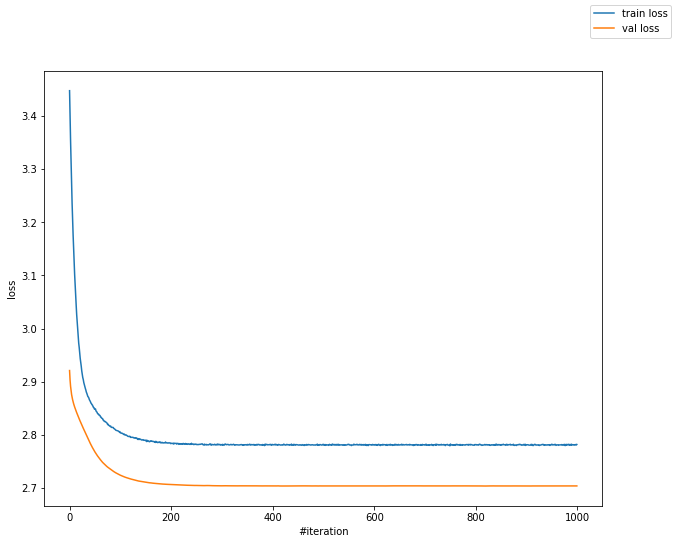

In [35]:
fig = plt.figure(figsize=(10, 8))    
plt.xlabel("#iteration")
plt.ylabel("loss")
plt.plot(loss_train_history, label='train loss')
plt.plot(loss_val_history, label='val loss')
fig.legend()
plt.show()

In [36]:
assert False

AssertionError: 

In [ ]:
dataset = FeaturesDataset(X)

In [ ]:
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.Adam(nn_model.parameters(), lr=1e-6)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.8)

loss_train_history, loss_val_history, best_model_name = train_model(
    nn_model, 
    DataLoader(dataset, batch_size=1000),
    DataLoader(dataset_test, batch_size=300),
    loss_func, optimizer, 100, scheduler)
print('end!')
print(best_model_name)

In [ ]:
fig = plt.figure(figsize=(10, 8))    
plt.xlabel("#iteration")
plt.ylabel("loss")
plt.plot(loss_train_history, label='train loss')
plt.plot(loss_val_history, label='val loss')
fig.legend()
plt.show()

In [ ]:
model2 = VAEModel(input_shape, seed=1024).to(device)
print(compute_accuracy(model2, DataLoader(dataset_test, batch_size=300), loss_func))
model2.load_state_dict(torch.load("checkpoint.pth"))
print(compute_accuracy(model2, DataLoader(dataset_test, batch_size=300), loss_func))

In [ ]:
model2 = VAEModel(input_shape, seed=1024).to(device)
print(compute_accuracy(model2, DataLoader(dataset_test, batch_size=300), loss_func))
save(nn_model, '111')

load2('111', model2)
#model2.load_state_dict(torch.load("checkpoint.pth"))
print(compute_accuracy(model2, DataLoader(dataset_test, batch_size=300), loss_func))

In [ ]:
#best_model_name = '21.04.2023_17.40.39.101646_epoch_88_loss_0.0'

In [ ]:
best_model = VAEModel(input_shape, seed=1024).to(device)
print(compute_accuracy(best_model, DataLoader(dataset_test, batch_size=300), loss_func))

load2(best_model_name, best_model)
print(compute_accuracy(best_model, DataLoader(dataset_test, batch_size=300), loss_func))

In [ ]:
emb_ds = FeaturesDataset(torch.diag(torch.ones(cols.shape[0])))

In [ ]:
emb_ds[:3, :3]

In [ ]:
for x in tqdm(DataLoader(emb_ds, batch_size=len(emb_ds))):
    artist_emb = nn_model.encode(x).detach().numpy()

In [ ]:
artist_emb

In [ ]:
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook
output_notebook()

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=600, height=400, show=True, **kwargs):
    """ draws an interactive plot for data points with auxilirary info on hover """
    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({ 'x' : x, 'y' : y, 'color': color, **kwargs })

    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)

    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    return fig

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
artist_emb_tsne = TSNE(2).fit_transform(artist_emb)
artist_emb_tsne

In [ ]:
draw_vectors(artist_emb_tsne[:, 0], artist_emb_tsne[:, 1], token=artists_arr)

In [ ]:
labels = KMeans(148).fit_predict(artist_emb)

In [ ]:
draw_vectors(artist_emb_tsne[:, 0], artist_emb_tsne[:, 1], color=[_colors[l] for l in labels],
             token=artists_arr,
             radius=20,)

In [ ]:
titles_df['label'] = labels
titles_df

In [ ]:
titles_df[titles_df['artist_name'] == 'Nirvana']

In [ ]:
titles_df[titles_df['label'] == 11]

In [ ]:
count = Counter(labels)
sorted(count.items(), key=lambda item: item[1], reverse=True)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(2)
scaler = StandardScaler()
artist_emb_pca = pca.fit_transform(artist_emb)
artist_emb_pca
#word_vectors_pca = scaler.fit_transform(word_vectors_pca)

In [ ]:
artist_emb_pca = scaler.fit_transform(artist_emb_pca)
artist_emb_pca

In [ ]:
artists_arr = list(titles_dict.values())
artists_arr[:10]

In [ ]:
draw_vectors(artist_emb_pca[:, 0], artist_emb_pca[:, 1], token=artists_arr)


In [ ]:
del umap

In [ ]:
import umap

In [ ]:
embedding = umap.UMAP(n_neighbors=5).fit_transform(artist_emb)

In [ ]:
draw_vectors(embedding[:, 0], embedding[:, 1], token=artists_arr)

In [ ]:
def find_nearest(data_vectors, query_vector, k=10):
    """
    given text line (query), return k most similar lines from data, sorted from most to least similar
    similarity should be measured as cosine between query and line embedding vectors
    hint: it's okay to use global variables: data and data_vectors. see also: np.argpartition, np.argsort
    """
    dists = data_vectors.dot(query_vector[:, None])[:, 0] / ((norms+1e-16)*np.linalg.norm(query_vector))
    nearest_elements = dists.argsort(axis=0)[-k:][::-1]
    out = [data[i] for i in nearest_elements]
    return out# <YOUR CODE: top-k lines starting from most similar>

In [ ]:
import matplotlib.colors as mcolors

In [ ]:
mcolors.CSS4_COLORS

In [ ]:
len(mcolors.CSS4_COLORS)

In [ ]:
from sklearn.cluster import DBSCAN, KMeans

In [ ]:
labels = KMeans(148).fit_predict(artist_emb)

In [ ]:
_colors = list(mcolors.CSS4_COLORS.values())

In [ ]:
draw_vectors(artist_emb_pca[:, 0], artist_emb_pca[:, 1], color=[_colors[l] for l in labels],
             token=artists_arr,
             radius=20,)

In [ ]:
labels_dbscan = DBSCAN(eps=0.66).fit_predict(artist_emb)
display(np.unique(labels_dbscan))
count = Counter(labels_dbscan)
sorted(count.items(), key=lambda item: item[1], reverse=True)

In [ ]:
titles_df['label'] = labels_dbscan
titles_df

In [ ]:
titles_df[titles_df['label'] == 11]

In [ ]:
draw_vectors(artist_emb_pca[:, 0], artist_emb_pca[:, 1], color=[_colors[l] for l in labels_dbscan],
             token=artists_arr,
             radius=20,)

In [ ]:
from collections import Counter

In [ ]:
labels = KMeans(300).fit_predict(artist_emb)

titles_df['label'] = labels
titles_df

In [ ]:
titles_df[titles_df['artist_name'] == 'Nirvana']

In [ ]:
titles_df[titles_df['label'] == 225]